# Lecture 3: Exponential & logistic growth

## Lecture overview

1. [Introduction](#section1)
2. [Exponential growth](#section2)
3. [Logistic growth](#section3)

<span id='section1'></span>
## 1. Introduction
<hr>

In nature, population sizes change over time in response to a myriad of factors, such as

- weather
- competition, predation, disease, ...
- resource availability

The simplest models describing changes in population size are **exponential growth** and **logistic growth** which assume

- a constant environment
- no interactions with other species 

The exponential model also assumes no competition among the members of a species for the available resources (**density-independent growth**), while the logistic model includes competition within a species (**density-dependent growth**).

Both of these models can be described in discrete and continuous time.

We’ll start with the simpler exponential model.

<span id='section2'></span>
## 2. Exponential growth
<hr>

### Exponential growth in discrete time

Imagine we start with $n_t$ individuals at some time $t$. If we assume that each of these individuals produces $b$ offspring, the number of individuals after reproduction is $n_t + n_t b = n_t(1 + b)$.

If we then assume a fraction $d$ die, the number of individuals remaining after death is $n_t(1+b) - n_t(1+b)d = n_t(1+b)(1-d)$.

With no further events in the life-cycle, this is the expected number of individuals in the next generation, $n_{t+1}$, which we can write as

$$
\begin{aligned}
n_{t+1}
&= n_t(1+b)(1-d) \\
&= n_t R \\
\end{aligned}
$$

where $R=(1+b)(1-d)$ is a constant referred to as the **reproductive factor**.

This equation, $n_{t+1}=n_t R$, is the **recursion equation** for exponential growth.

!!! note "Exponential vs geometric growth"

    Technically this recursion equation describes "geometric" growth, since $n_t$ will grow with $t$ as a geometric series, but here we simply call it "exponential growth in discrete time" to make a clear connection with exponential growth in continuous time.

We can also describe the *change* in the number of individuals by subtracting off the current number,

$$
\begin{aligned}
\Delta n 
&= n_{t+1} - n_t\\ 
&= n_t(R-1)
\end{aligned}
$$

This is the **difference equation** for exponential growth, with discrete-time growth rate $r_d = R-1 = (1+b)(1-d)-1 = b - d - bd$.

Let's plot the dynamics described by these equations for a particular set of parameter values.

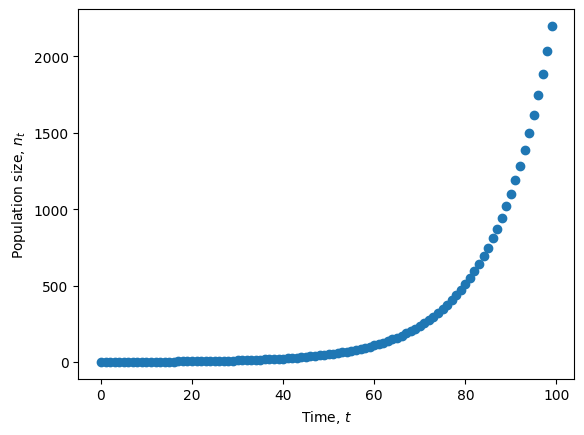

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_discrete(nt, b, d):
    '''recursion equation giving population size in next time step as a function
    of the population size at this time, nt, and the birth and death rates, b and d.'''
    return nt * (1 + b) * (1 - d)

# Grow population
nd, nt, b, d = [], 1, 0.2, 0.1 #define empty list nd to store population sizes and choose parameter values
for t in np.arange(0,100): #for time from 0 to 99
    nt = exponential_discrete(nt, b, d) #get the next population size from the recursion equation
    nd.append(nt) #and append it to the list

# Plot growth
fig, ax = plt.subplots()
ax.scatter(np.arange(0, 100), nd) #plot population size at each time
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Population size, $n_t$')
plt.show()

### Exponential growth in continuous time

Now assume that each individual continuously gives birth at rate $b$ and dies at rate $d$.

If there are $n_t$ individuals in the population at time $t$, then the rate of change in the number of individuals is

$$
\begin{aligned}
\frac{\mathrm{d} n_t}{\mathrm{d} t} 
&= n_t b - n_t d\\
&= n_t (b - d)\\
&= n_t r_c
\end{aligned}
$$

This is the **differential equation** for exponential growth with continuous-time growth rate $r_c = b - d$.

Note that the growth rate in the discrete-time model was $r_d = b - d - b d$. The difference between the two growth rates reflects the fact that birth and death cannot happen at the exact same time in the continuous-time model (so there is no $b d$ term), while offspring that are born can die before the next generation in the discrete-time model (causing the $b d$ term).

Let's also plot these dynamics.

!!! note "Approximating a differential equation"

    The differential equation describes the change in the population size in an "infinitesimally" small amount of time, $\mathrm{d}t$. To plot these dynamics we therefore make an approximation, taking $\mathrm{d}t$ to be small, but not infinitely so. Rearranging the differential equation gives $\mathrm{d}n_t = n_t(b-d)\mathrm{d}t$ and the population size after $\mathrm{d}t$ is therefore $n_{t+\mathrm{d}t} = n_t + \mathrm{d}n_t$. This is a recursion equation that approximates our differential equation.

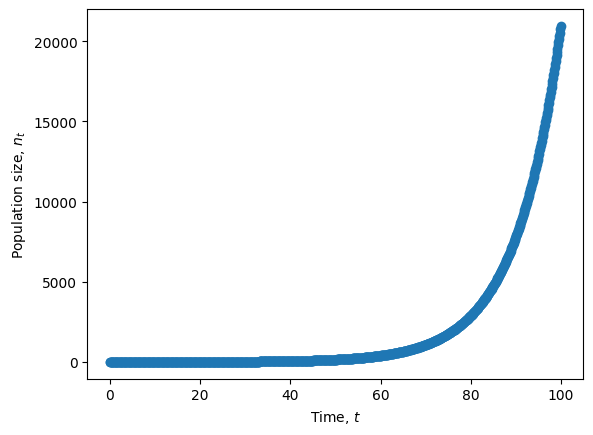

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_continuous(nt, b, d, dt):
    '''approximation of the differential equation giving population size after a small time interval, dt,
    as a function of the population size at this time, nt, and the birth and death rates, b and d.'''
    return nt + nt * (b - d) * dt

# Grow population
nc, nt, dt = [], 1, 0.1 #define empty list nc to store population sizes and choose parameter values (keep b and d as above)
for t in np.arange(0,100,dt): #for time from 0 to 99 by increments of dt
    nt = exponential_continuous(nt, b, d, dt) #get the next population size from the recursion equation
    nc.append(nt) #and append it to the list

# Plot growth
fig, ax = plt.subplots()
ax.scatter(np.arange(0, 100, dt), nc) #plot population size at each time
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Population size, $n_t$')
plt.show()

We can now combine our two plots to compare these two predictions, exponential growth in discrete vs. continuous time.

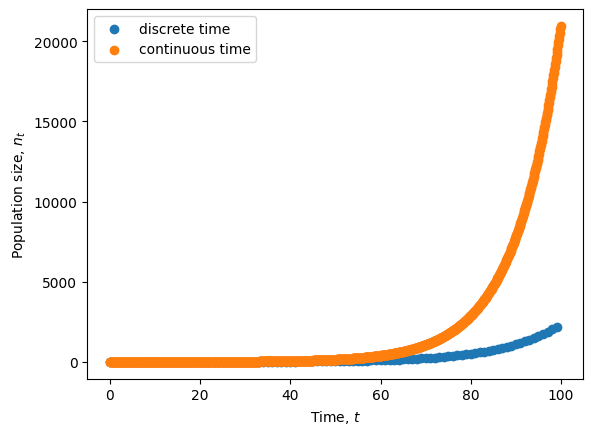

In [3]:
# Plot growth
fig, ax = plt.subplots()
ax.scatter(np.arange(0, 100), nd, label='discrete time') #plot population size at each time
ax.scatter(np.arange(0, 100, dt), nc, label='continuous time') #plot population size at each time
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Population size, $n_t$')
plt.legend()
plt.show()

!!! note "Why the difference?"

    The predictions are very similar at first but then noticeably diverge.  
    
    The time of this divergence depends on the values of parameters $b$ and $d$. Try increasing or decreasing both $b$ and $d$ and think about why it has that effect.

    Also think about why the continuous time model predicts a larger population size than the discrete time model. 

    Hint: remember the difference in the growth rates between the two models is $bd$. 

### The trouble with exponential growth

Exponential growth cannot continue indefinitely.

Take for example a population of pheasants on an island off the coast of Washington State. Just 8 pheasants were introduced in 1937, but the population then grew exponentially, tripling in size every year ($R=3$) for the first 5 years.  Had this population continued to grow exponentially there would have been 7 million of them by the year 1950 and $10^{28}$ by now – which at 2 kg per pheasant is 3000 times the mass of the earth!!

Although populations may initially experience exponential growth, resources eventually become depleted and competition becomes more severe. This suggests that we should change our model assumptions.

<span id='section3'></span>
## 3. Logistic growth
<hr>

Exponential growth assumes the growth rate ($r_d$, $r_c$) is constant. **Logistic growth** relaxes this assumption, and instead assumes that the growth rate decreases linearly with population size, due to competition for resources within the population. 

### Logistic growth in discrete time

In discrete-time, the reproductive factor under logistic growth can be written as

$$R(n_t) = 1 + r\left(1 - \frac{n_t}{K}\right)$$

Notice that each individual is expected to have one offspring ($R=1$) if the **intrinsic growth rate** (ie, growth rate when rare) is zero, $r = 0$, or if the population size is at **carrying capacity**, $n_t=K$. 

Try plotting the reproductive factor as a function of $n_t$ for a few different values of $r$ and $K$.

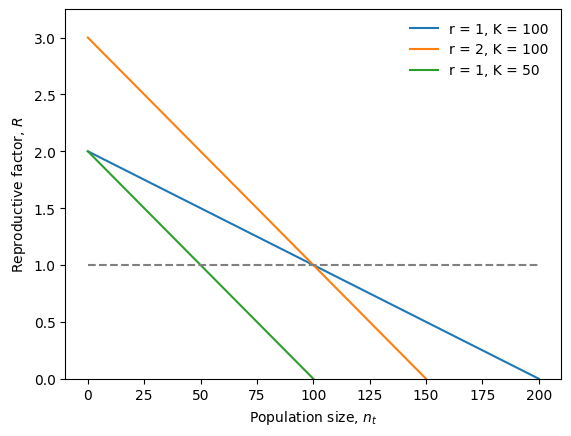

In [4]:
# Reproductive factor for logistic growth
def logistic_discrete(nt, r, K):
    '''reproductive factor in discrete logistic model with growth rate r and carrying capacity k'''
    return 1 + r * (1 - nt/K) 

# Compare a few different growth rates and carrying capacities
fig, ax = plt.subplots()
for r, K in zip([1, 2, 1], [100, 100, 50]): #for each pair of r and K values
    nt = np.linspace(0, 200) #for a range of population sizes from 0 to 200
    R = logistic_discrete(nt, r, K) #calculate the reproductive factor
    ax.plot(nt, R, label=f"r = {r}, K = {K}") #and plot

ax.plot(nt, [1 for i in nt], '--', color='gray') #1 line for reference
ax.set_xlabel('Population size, $n_t$')
ax.set_ylabel('Reproductive factor, $R$')
ax.legend(frameon=False)
plt.ylim(0,None)
plt.show()

The population size in the next generation is the expected number of offspring per parent times the the total number of parents

$$n_{t+1} = \left(1 + r\left(1-\frac{n_t}{K}\right)\right)n_t$$

This is the recursion equation for logistic growth.

This recursion is a **non-linear** function of $n_t$ (*non-linear means that there is a term in the equation where the term is taken to some power other than 1; here if we expand out the recursion we get a $n_t^2$ term*). This reflects the fact that logistic growth models an interaction between individuals (competition).

The change in population size from one generation to the next, $\Delta n$, is therefore

$$\Delta n = n_{t+1} - n_t = r\left(1 - \frac{n_t}{K}\right)n_t$$

Based on this difference equation, when will the population grow in size?

Test out your answer by plotting population size over time in the discrete-time logistic model. Try changing the initial population size or carrying capacity so that $n_t > K$.

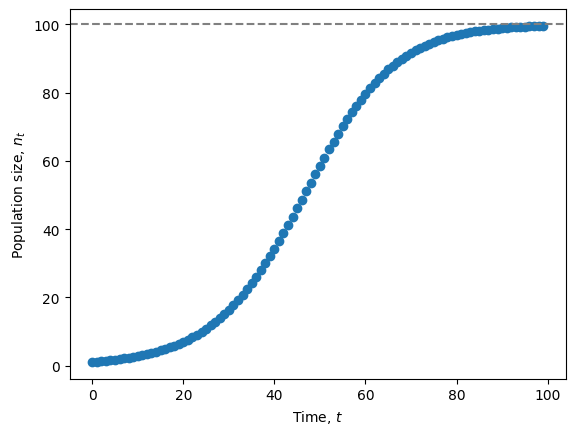

In [5]:
# Initialize parameters
n, nt, r, K = [], 1, 0.1, 100 #list, initial population size, intrinsic growth rate, carrying capacity

# Grow population under logistic growth
for t in np.arange(0, 100):
    nt = nt * logistic_discrete(nt, r, K)
    n.append(nt)

# Plot growth
fig, ax = plt.subplots()
ax.scatter(np.arange(0, 100), n)
ax.axhline(100, label=f"K = {K}", linestyle='dashed', color='gray') #carrying capacity as dashed line

# Add annotations
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Population size, $n_t$')
plt.show()

!!! info "Complex dynamics"

    Logistic growth in discrete time can show some surprisingly complex dynamics, which we'll explore in lab.

### Logistic growth in continuous time

The model of logistic growth in continuous time, as with discrete time, follows from the assumption that each individual has a **growth rate** that decreases as a linear function of the population size $r(1 - n_t/K)$.

If there are $n_t$ individuals in the population at time $t$, then the rate of change of the population size will be

$$\frac{\mathrm{d}n_t}{\mathrm{d}t} = r\left(1 - \frac{n_t}{K}\right)n_t$$

This is a **differential equation** of logistic growth.

Note that in both discrete and continuous time the logistic growth model reduces to the exponential growth model as $n_t/K$ approaches 0, i.e., when the population size is much smaller than the carrying capacity $n_t << K$.

!!! note "An example of logistic growth"

    Dr. Sarah Otto cultured haploid (one copy of each chromosome) and diploid (two copies of each chromosome) populations of *Saccharomyces cereviseae*. She observed the following population sizes for the two types of cells:

    <center>

    ![](lecture-03-img/yeast_otto_1.png)

    </center>

    <center><sup>Figure. The size of haploid and diploid yeast populations in a controlled laboratory experiment.</sup></center>

    Although the populations grow nearly exponentially at first, growth decreased as population size increased (i.e., density-dependent growth was observed).

    The carrying capacity ($K$) is clearly larger for the haploid cells, but do haploid and diploid cells have different intrinsic growth rates ($r$)?

    By fitting the logistic growth model described above to the data, Dr. Otto estimated the parameter values to be

    - Haploid: r = 0.55, K = 3.7 x 10^8
    - Diploid: r = 0.55, K = 2.3 x 10^8

    The growth rates therefore do not differ (visibly or statistically). With these parameter estimates, the logistic model nicely fits the data:

    <center>

    ![](lecture-03-img/yeast_otto_2.png)

    </center>

    <center><sup>Figure. Population size of haploid and diploid yeast fit with logistic growth models.</sup></center>

    *Note: This may be a bit misleading, as such excellent model fits are rarely observed, especially outside the lab!*

!!! todo "To do: make the above plots in Python"